In [103]:
import networkx as nx
import numpy as np
import json
import matplotlib.pyplot as plt
from pprint import pprint as pp
from braket.aws import AwsDevice

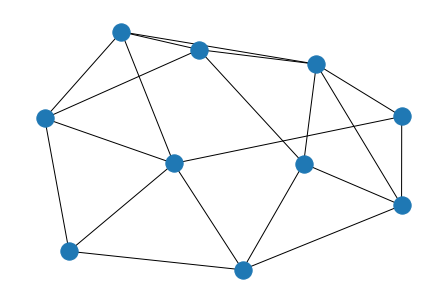

In [105]:
random = nx.random_graphs.connected_watts_strogatz_graph(10,4,0.15)
nx.draw(random)

In [117]:
# print all properties of random
pp(vars(random))
random.edges

{'_adj': {0: {1: {}, 2: {}, 8: {}, 9: {}},
          1: {0: {}, 2: {}, 3: {}, 4: {}, 9: {}},
          2: {0: {}, 1: {}, 3: {}, 5: {}},
          3: {1: {}, 2: {}, 4: {}, 5: {}},
          4: {1: {}, 3: {}, 7: {}},
          5: {2: {}, 3: {}, 6: {}, 7: {}},
          6: {5: {}, 7: {}, 8: {}},
          7: {4: {}, 5: {}, 6: {}, 8: {}, 9: {}},
          8: {0: {}, 6: {}, 7: {}, 9: {}},
          9: {0: {}, 1: {}, 7: {}, 8: {}}},
 '_node': {0: {},
           1: {},
           2: {},
           3: {},
           4: {},
           5: {},
           6: {},
           7: {},
           8: {},
           9: {}},
 'adj': AdjacencyView({0: {1: {}, 9: {}, 2: {}, 8: {}}, 1: {0: {}, 2: {}, 3: {}, 9: {}, 4: {}}, 2: {1: {}, 3: {}, 0: {}, 5: {}}, 3: {2: {}, 4: {}, 1: {}, 5: {}}, 4: {3: {}, 7: {}, 1: {}}, 5: {6: {}, 3: {}, 7: {}, 2: {}}, 6: {5: {}, 7: {}, 8: {}}, 7: {6: {}, 8: {}, 5: {}, 9: {}, 4: {}}, 8: {7: {}, 9: {}, 6: {}, 0: {}}, 9: {8: {}, 0: {}, 7: {}, 1: {}}}),
 'degree': DegreeView({0: 4, 1: 5

EdgeView([(0, 1), (0, 9), (0, 2), (0, 8), (1, 2), (1, 3), (1, 9), (1, 4), (2, 3), (2, 5), (3, 4), (3, 5), (4, 7), (5, 6), (5, 7), (6, 7), (6, 8), (7, 8), (7, 9), (8, 9)])

In [95]:
# set the points in random3 equal to a variable pos
pos = nx.spring_layout(random)

graph = random

We choose the unit disk radius as $R_u = \sqrt{R_\text{min} R_\text{max}}$

In [96]:
def find_UDG_radius(position, graph):
    '''
    Computes the optimal unit disk radius for a particular set of positions and graph.
    position   - [N x 2] array of points
    graph       - network connectivity graph. This should be a unit disk graph.
    
    returns
    radius      - Optimal unit disk radius of the graph
    rmin        - Minimum distance
    rmax        - Maximum distance
    '''
    
    dists = np.sqrt((position[:,0,None] - position[:,0])**2
               + (position[:,1,None] - position[:,1])**2)
    rmin = 0
    rmax = np.inf
    for i in range(position.shape[0]):
        for j in range(i+1,position.shape[0]):
            if (i,j) in graph.edges:
                if rmin<dists[i,j]:
                    rmin = dists[i,j]
            elif (i,j) not in graph.edges:
                if rmax>dists[i,j]:
                    rmax = dists[i,j]
    
    if rmin>rmax:
        print(rmin,rmax)
        raise BaseException("Graph is not a unit disk graph!")
    
    return np.sqrt(rmin*rmax),rmin,rmax

# Find unit disk radius
unitdisk_radius,min_radius,max_radius = find_UDG_radius(pos,graph)

TypeError: unhashable type: 'slice'

In [97]:
unitdisk_radius = 1.6817928305074292

In [116]:
def get_blockade_radius(detuning: float, rabi: float) -> float:
    """calculate Blockade Radius given the detuning and rabi amplitude. 

    Args:
        detuning (float): detuning value.
        ravi (float): rabi value
    Returns:
        float: blockade radius
    """
    
    demon = np.sqrt(detuning**2+rabi**2)
    if demon > 0:
        return (C6/demon)**(1/6)
    else:
        return np.inf

C6 = 5.42E-24

Delta_final = 20e6 # rad/sec

# Find blockade radius
blockade_radius = get_blockade_radius(Delta_final, 0) # no rabi amplitude at the end
print('Blockade radius of Rydberg system is {:0.3e}m'.format(blockade_radius))
print('Unit disk radius of logical graph is {:0.3f}'.format(unitdisk_radius))

# Compute scaling value a, which converts between logical and physical coordinates
a = blockade_radius / unitdisk_radius

# Generate the atom register
from braket.ahs.atom_arrangement import AtomArrangement
small_register = AtomArrangement()
for x in pos:
    small_register.add((a * x).round(7))
    
    
from quera_ahs_utils.plotting import show_register
show_register(small_register,blockade_radius = a*1.5)


Blockade radius of Rydberg system is 8.044e-06m
Unit disk radius of logical graph is 1.682


TypeError: 'numpy.float64' object is not iterable